In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./thailand_co2_emission_1987_2022.csv')
data.head()

,year,month,source,fuel_type,emissions_tons
0,1987,1,transport,oil,1588.61
1,1987,2,transport,oil,1428.29
2,1987,3,transport,oil,1581.16
3,1987,4,transport,oil,1557.40
4,1987,5,transport,oil,1513.35


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2424 non-null   int64  
 1   month           2424 non-null   int64  
 2   source          2424 non-null   object 
 3   fuel_type       2424 non-null   object 
 4   emissions_tons  2424 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.8+ KB


In [6]:
# Preprocessing
# One-hot encode categorical columns ('source' and 'fuel_type')
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = encoder.fit_transform(data[['source', 'fuel_type']])

In [9]:
# Combine encoded categorical data with numerical features ('year', 'month')
numerical_data = data[['year', 'month']].values
X = np.hstack((numerical_data, categorical_data))

# Target variable ('emissions_tons')
y = data['emissions_tons'].values

In [18]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize numerical features
scaler = StandardScaler()
X_train[:, :2] = scaler.fit_transform(X_train[:, :2])
X_test[:, :2] = scaler.transform(X_test[:, :2])

In [20]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

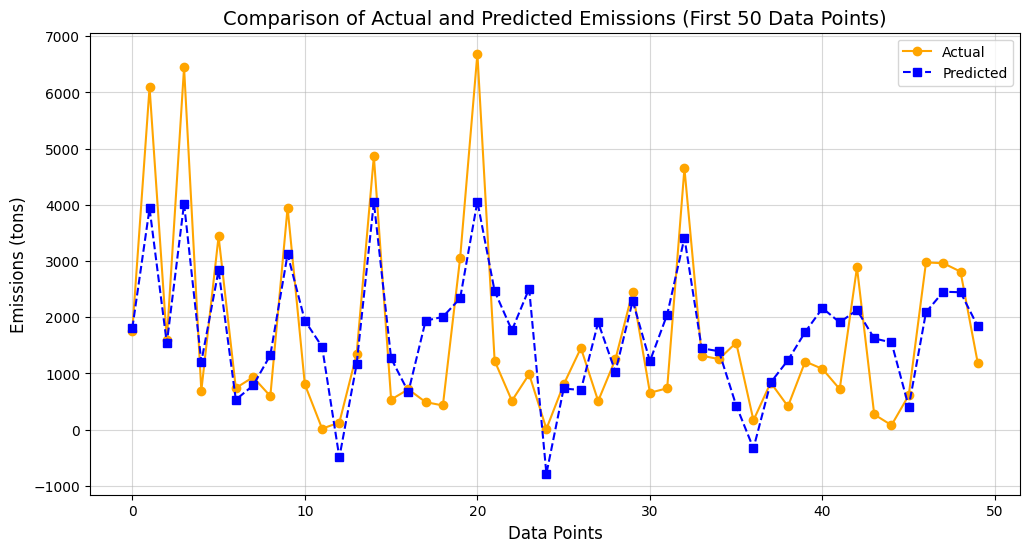

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:50], label='Actual', marker='o', linestyle='-', color='orange')
plt.plot(y_pred[:50], label='Predicted', marker='s', linestyle='--', color='blue')
plt.title('Comparison of Actual and Predicted Emissions (First 50 Data Points)', fontsize=14)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Emissions (tons)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()